In [8]:
%matplotlib inline

from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt

In [9]:
num_samples = 100
x = np.sort(np.random.rand(1, num_samples) * 500)
y = np.copy(x)
noise = np.random.normal(0, 1, (1, num_samples))
y_noise = np.copy(y) + noise * 30
y_noise[np.where(x <= 40)] *= 10
y_noise[np.where((x >= 200) & (x <= 230))] *= -4
y_noise[np.where((x >= 400) & (x <= 430))] *= 4

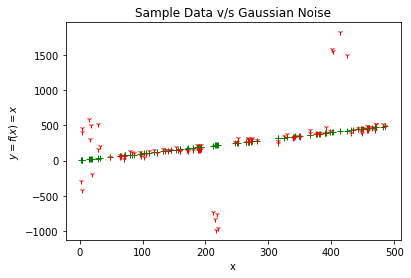

In [10]:
plt.xlabel('x')
plt.ylabel('$y = f(x) = x$')
plt.title('Sample Data v/s Gaussian Noise')
plt.plot(x, y, 'g+')
plt.plot(x, y_noise, 'r1')
plt.show()

In [11]:
lm = linear_model.LinearRegression()
num_train = int(num_samples * 0.6)
x_train = x[0, :num_train].reshape(-1, 1)
y_train = y_noise[0, :num_train].reshape(-1, 1)
x_test = x[0, num_train:].reshape(-1, 1)
y_test = y_noise[0, num_train:].reshape(-1, 1)
lm.fit(x_train, y_train)
print(lm.coef_, lm.intercept_)

[[-0.50468508]] [ 153.32868559]


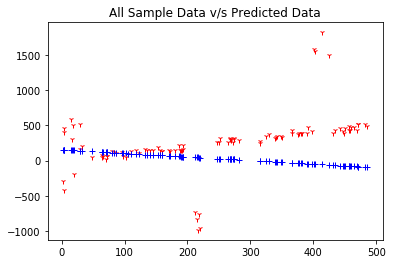

In [12]:
plt.title('All Sample Data v/s Predicted Data')
plt.plot(x, y_noise, 'r1')
plt.plot(x, x * lm.coef_ + lm.intercept_, 'b+')
plt.show()

In [13]:
rlm = linear_model.RANSACRegressor(linear_model.LinearRegression())
rlm.fit(x_train, y_train)
print(rlm.estimator_.coef_, rlm.estimator_.intercept_)

[[ 1.10326537]] [-11.21194179]


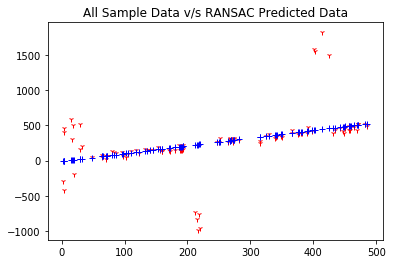

In [14]:
plt.title('All Sample Data v/s RANSAC Predicted Data')
plt.plot(x, y_noise, 'r1')
plt.plot(x, x * rlm.estimator_.coef_ + rlm.estimator_.intercept_, 'b+')
plt.show()